## Plotting Data With Pandas and Matplotlib

This notebook provides a tutorial for using matplotlib in conjunction with pandas in the Jupyter notebook. 

We'll be making the following types of plots:
* line
* area
* bar
* stacked bar
* histogram

We'll be adjusting the look and feel of the plots via these components:
* title
* axis ticks
* axis labels
* series colors
* legend
* axis limits
* gridlines

In [16]:
# Notebook magic function to make plots appear inline
%matplotlib inline

# Numpy, pandas and pyplot imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Matplotlib formatting settings
pd.set_option('display.mpl_style','default')
plt.rcParams['figure.figsize'] = (10,6)

###Database Setup

To run the examples, you'll need to have a connection to the Hubway dataset running on the DataScience Redshift instance. We'll use the psycopg2 library and pandas to build dataframes from SQL queries.

In [18]:
import psycopg2

url = 'toy-db.cex3rfvdw0wv.us-west-2.redshift.amazonaws.com'
database = 'bikeshare'
username = 'read_only'
password = 'U8qz3wmD&Eej*gEB'

conn = psycopg2.connect(
    database=database,
    port=5439,
    password=password,
    user=username,
    host=url
)

### Part I: Quickstart

Here we'll use pandas to quickly generate a plot from a dataframe. In this example, we'll query the Hubway dataset to find the count of trips by date.

In [19]:
# Define query
query = """
select
    date(start_date) as start_date
    , count(trip_id) trips
from
    trips
group by
    1
order by
    1
"""

# Execute query storing results in pandas DataFrame
df = pd.read_sql(query, conn)

The pandas `read_sql` function takes a query and returns a DataFrame containing the query results. Let's take a look at the results. 

In [20]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 2 columns):
start_date    628 non-null object
trips         628 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.7+ KB
None


Calling the `info` method on a dataframe lists the index, columns and corresponding datatypes of the DataFrame. We can see here that we have two columns, `start_date` and `trips` with `object` and `int64` datatypes, respectively.

To see a sample of the first five rows, we can call the `head` method on the DataFrame.

In [21]:
df.head()

,start_date,trips
0,2011-07-28,424
1,2011-07-29,536
2,2011-07-30,800
3,2011-07-31,1007
4,2011-08-01,788


Since this dataset is a timeseries, let's convert the `start_date` column to a dateformat recognized by pandas and set it as the index of the DataFrame.

In [22]:
# Convert start_date to datetime
df.start_date = pd.to_datetime(df.start_date)

# Set start_date as the index
df = df.set_index('start_date')

Don't worry if the last two steps are unclear at this point, we'll revisit in the future. For now, they'll make the plotting we're about to do easier.

At this point we're ready to start visualizing the data with plots. Pandas provides a robust plotting interface directly on the DataFrame. To get started, simple call the `plot` method on the DataFrame. After plotting the DataFrame, also execute `plt.show()` which tells matplotlib to display the plot in the notebook. You'll always want to include this at the end of all your plotting cells.

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


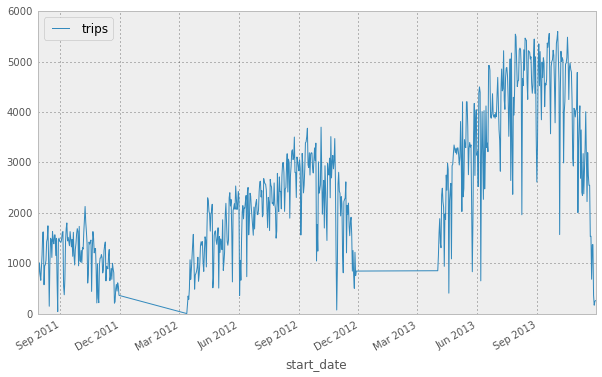

In [23]:
# Call plot
df.plot()
# Tell matplotlib to show the plot
plt.show()

And now you have your first plot! Doesn't look too bad, either. You can see that pandas automatically set the index as the x-axis, grouped the date labels on the x-axis into months and rotated them, labeled the x-axis with the `start-date` index label, and added a legend with the `trips` label. This is a good start, but what if we wanted to make a few tweaks such as altering the color, adding a title and cleaning up the x-axis label?

### Part II: Customization

The pandas plotting interface provides several parameters we can adjust to alter the look and feel of the resulting plot. This [tutorial](http://pandas.pydata.org/pandas-docs/stable/visualization.html) has a wealth of examples and the [API reference](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) gives you a complete overview of the possibilities.

Let's start by specifying a `title` parameter in the plot function. Within the `plot` method, enter `title=` followed by the desired title wrapped in quotes to specify that it is a string.

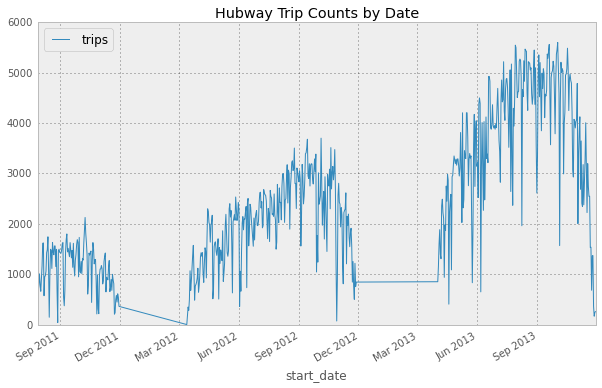

In [24]:
df.plot(title='Hubway Trip Counts by Date')
plt.show()

Now we have a title at the top of the chart. We can set multiple parameters at once within the `plot` call by separating them with commas. Here, we'll set the title, remove the legend and change the color of the line.

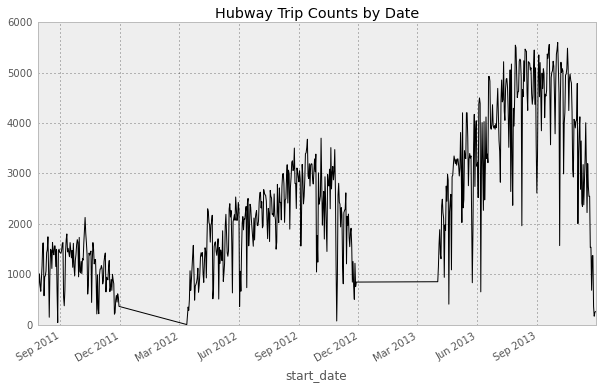

In [25]:
df.plot(title='Hubway Trip Counts by Date',
        legend=False,
        color='black')
        
plt.show()

The `plot` method provides a decent level of customization directly, but if we want additional options we'll need to use the matplotlib interface via the `plt` object.

Let's change the `start_date` x-axis label to something cleaner. We can do this by setting the `xlabel` property on the `plt` object.

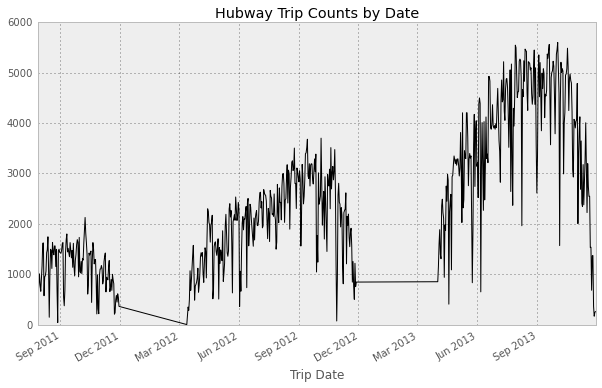

In [26]:
df.plot(title='Hubway Trip Counts by Date',
        legend=False,
        color='black')

# Change the x-axis label
plt.xlabel('Trip Date')
plt.show()

We can use the same technique to adjust the y-axis label via the `ylabel` property. In addition, let's adjust the size of the title upward from the default. To do this, we'll remove the `title` parameter from the initial `plot` call, and then set the title via the `title` property on the `plt` object, passing in an additional `fontsize` parameter.

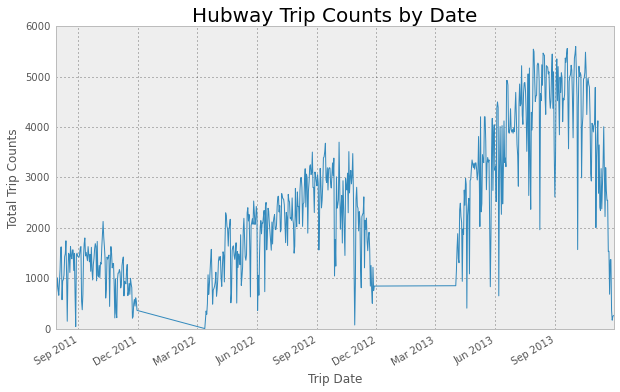

In [27]:
# Remove title from initial plot call
df.plot(legend=False)

# Change the x-axis label
plt.xlabel('Trip Date')

# Set the y-axis label
plt.ylabel('Total Trip Counts')

# Set the title, specifiying fontsize
plt.title('Hubway Trip Counts by Date', fontsize=20)

plt.show()

### Part III: Additional Plot Types

What if we wanted to see more than one line on the same plot? For example, the trip counts by registered and casual users would allow us to see the difference in activity by these two groups. 

#### Multiple Series Line Plots
From the Hubway dataset, we'll select trip counts and sum into two columns depending on the subscription type of that trip. Then we'll apply the same date transformation and index setting as in the previous plot.

In [52]:
# Define query
query = """
select
    date(start_date) as start_date
    , sum(case when subsc_type = 'Registered' then 1 else 0 end) as "Registered Trips"
    , sum(case when subsc_type = 'Casual' then 1 else 0 end) as "Casual Trips"
from
    trips
group by
    1
order by
    1
"""

# Execute query storing results in pandas DataFrame
df = pd.read_sql(query, conn)

# Convert start_date to datetime
df.start_date = pd.to_datetime(df.start_date)

# Set start_date as the index
df = df.set_index('start_date')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 628 entries, 2011-07-28 to 2013-11-30
Data columns (total 1 columns):
trips    628 non-null int64
dtypes: int64(1)
memory usage: 9.8 KB


In [30]:
df.head()

,trips
start_date,
2011-07-28,424
2011-07-29,536
2011-07-30,800
2011-07-31,1007
2011-08-01,788


We can see from looking at the output that we have two columns and a datetime index. When we call `plot` on this DataFrame, pandas automatically plots both columns on the same axis and selects different colors for both. This time we'll keep the legend to allow us to differentiate between the two series, and we can see that the column names appear as labels in the legend.

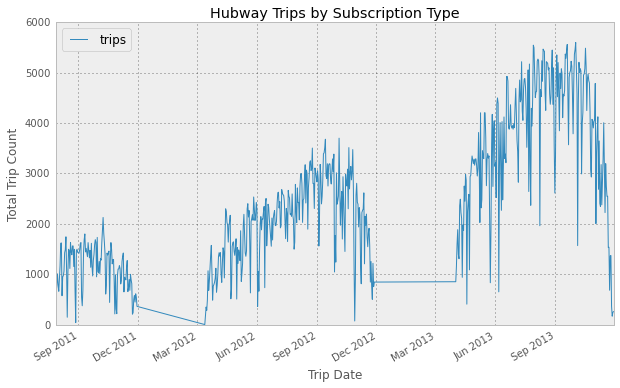

In [31]:
df.plot(title='Hubway Trips by Subscription Type')

# Set X and y labels
plt.xlabel('Trip Date')
plt.ylabel('Total Trip Count')
plt.show()

#### Area plots

We construct area plots the same as line plots, simply add `kind='area'` to the `df.plot` call. We'll get the same line with the area underneath filled in with the color.

In [32]:
# Same query as initial line plot
query = """
select
    date(start_date) as start_date
    , count(trip_id) trips
from
    trips
group by
    1
order by
    1
"""

df = pd.read_sql(query, conn)
df.start_date = pd.to_datetime(df.start_date)
df = df.set_index('start_date')

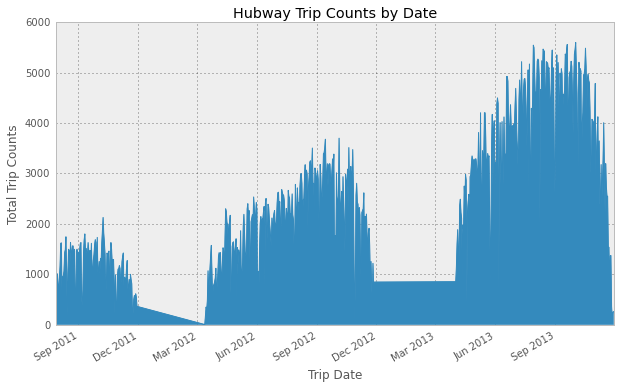

In [33]:
# Set kind='area'
df.plot(kind='area', legend=False)

plt.xlabel('Trip Date')
plt.ylabel('Total Trip Counts')
plt.title('Hubway Trip Counts by Date')
plt.show()

#### Bar plots

For categorical data, we often use a bar plot to compare magnitudes of different categories. Let's look at the number of trips by hour for Hubway. In the SQL query, we'll group by the hour the trip starter and count the number of trips. 

In [34]:
query = """
select
    extract(hour from start_date) as start_hour
    , count(trip_id) trips
from
    trips
group by
    1
order by
    1
"""
df = pd.read_sql(query, conn)

# Set the index of the DataFrame
df = df.set_index('start_hour')

In [35]:
df.head()

,trips
start_hour,
0,17826
1,14344
2,10488
3,3056
4,2201


We now have a DataFrame indexed by `start_hour` with a single `trips` column. To plot as a bar chart, we pass specify `'bar'` in the `kind` parameter of the DataFrame plot function.

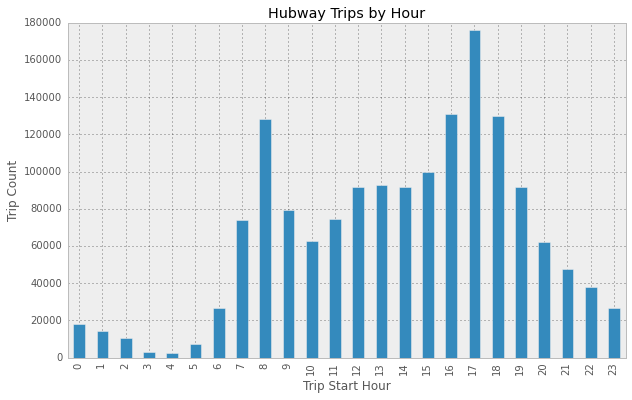

In [36]:
# Plot kind='bar'
df.plot(kind='bar', legend=False)

plt.xlabel('Trip Start Hour')
plt.ylabel('Trip Count')
plt.title('Hubway Trips by Hour')

plt.show()

From this plot we can clearly see that Hubway usage initially peaks during the morning commute between 8 AM and 9 AM, followed by another peak in the evening between 5 PM and 6 PM. 

Because our labels are concise enough to fit side-by-side, let's adjust the rotation to improve readability. We can do this via the `rot` parameter of the `plot` method.

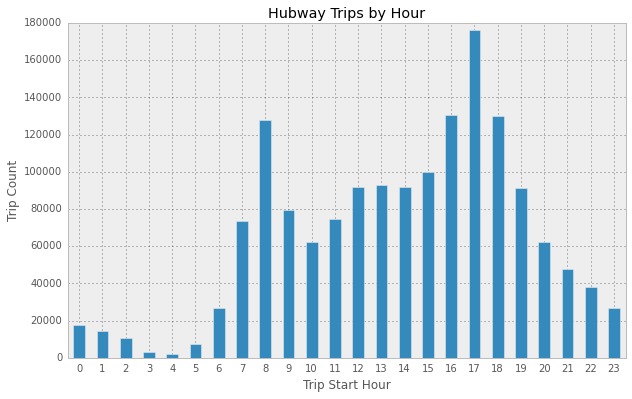

In [37]:
# Change rotation of labels to 0 degrees
df.plot(kind='bar', legend=False, rot=0)

plt.xlabel('Trip Start Hour')
plt.ylabel('Trip Count')
plt.title('Hubway Trips by Hour')

plt.show()

#### Horizontal bar plots
Horizontal bar plots are another way of looking at categorical data and are preferred to bar plots for comparing relative differences. Let's find the top 10 originating stations by average daily trip count with this query.

In [53]:
query = """
with station_date_trips as
(
select
    station
    , date(start_date) trip_date
    , count(trip_id) trips
from
    trips
join
    stations
on
    strt_statn = statn_id
group by
    1,2
)
select
    station
    , avg(trips) avg_daily_trips
from
    station_date_trips
group by
    1
order by
    2 desc
limit 10
"""

df = pd.read_sql(query, conn)
df = df.set_index('station')

df.head()

,avg_daily_trips
station,
MIT at Mass Ave / Amherst St,93
South Station - 700 Atlantic Ave.,90
Boston Public Library - 700 Boylston St.,71
TD Garden - Causeway at Portal Park #1,67
Harvard Square at Mass Ave/ Dunster,66


We now have a dataframe indexed by station with avg_daily_trips. To plot a horizontal bar plot, we pass `'barh'` as the `kind` parameter.

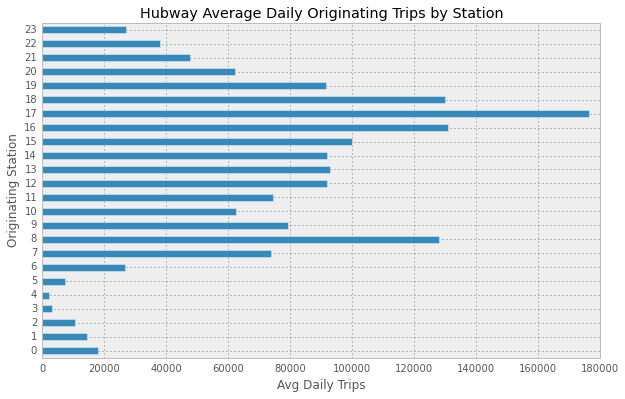

In [39]:
df.plot(kind='barh', legend=False)

plt.xlabel('Avg Daily Trips')
plt.ylabel('Originating Station')
plt.title('Hubway Average Daily Originating Trips by Station')

plt.show()

We see that South Station and MIT at Mass Ave are the most popular stations on average in the Hubway system. 

By default, pandas plots the DataFrame from the bottom up. To plot the most frequently used stations at the top, we can sort the DataFrame and then plot. We'll call the `sort` function on the DataFrame and pass in `'avg_daily_trips'` as the columns parameter that we'll be sorting by and specify `ascending=True` to sort ascending. This yields a DataFrame with the largest totals at the bottom ensuring that they'll be plotted at the top of the bar plot.

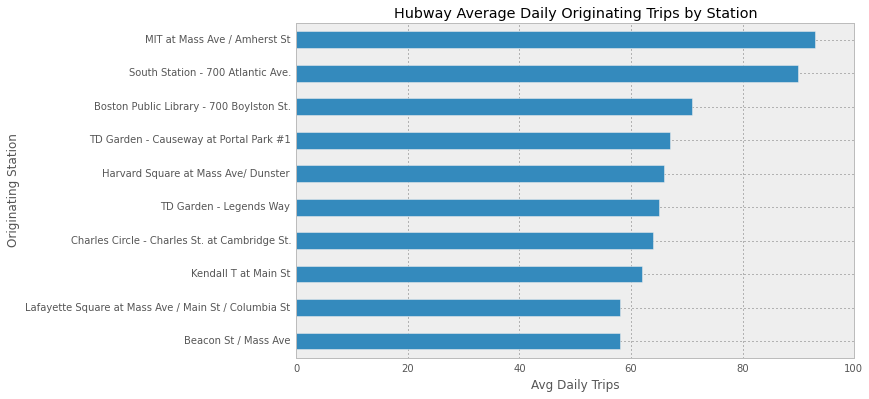

In [54]:
df = df.sort(columns=['avg_daily_trips'], ascending=True)

df.plot(kind='barh', legend=False)

plt.xlabel('Avg Daily Trips')
plt.ylabel('Originating Station')
plt.title('Hubway Average Daily Originating Trips by Station')

plt.show()

#### Stacked bar plots

Stacked bar plots are useful for comparing multiple categories in one plot. We can take the same station originating data for the top 10 stations, and further segment it by subscriber type.

In [56]:
query = """
with station_date_trips as
(
select
    station
    , date(start_date) trip_date
    , sum(case when subsc_type = 'Registered' then 1 else 0 end) as "Registered"
    , sum(case when subsc_type = 'Casual' then 1 else 0 end) as "Casual"
from
    trips
join
    stations
on
    strt_statn = statn_id
group by
    1,2
)
select
    station
    , avg(registered) Registered
    , avg(casual) casual
from
    station_date_trips
group by
    1
order by
    avg(registered) + avg(casual) desc
limit 10
"""

df = pd.read_sql(query, conn)
df = df.set_index('station')

df.head()

,registered,casual
station,,
MIT at Mass Ave / Amherst St,67,26
South Station - 700 Atlantic Ave.,74,16
Boston Public Library - 700 Boylston St.,42,29
TD Garden - Causeway at Portal Park #1,54,12
Harvard Square at Mass Ave/ Dunster,33,32


To stack the bars, pass `True` in the stacked parameter.

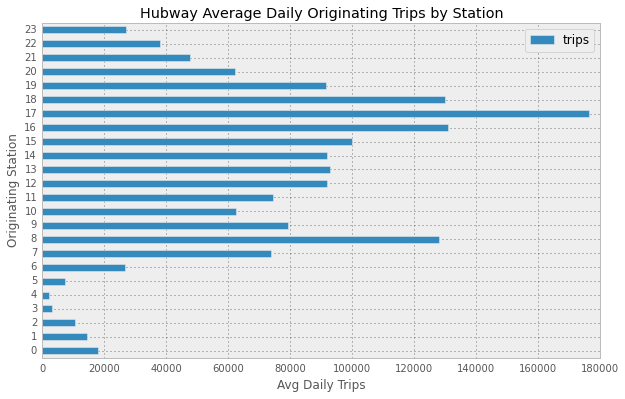

In [42]:
# Add stacked=True to df.plot
df.plot(kind='barh', stacked=True)

plt.xlabel('Avg Daily Trips')
plt.ylabel('Originating Station')
plt.title('Hubway Average Daily Originating Trips by Station')

plt.show()

Now we have the bar plot with registered users in blue and casual users in purple. We can see that stations such as Harvard Square have a much higher rate of casual users than stations such as South Station.

#### Histograms

We often want to look at the distribution of a variable and the most common method if visualizing the distribution is the histogram. Let's use query similar to the one we utilized for the horizontal bar plot but remove the row limit to get average daily trips for all stations. 

In [57]:
query = """
with station_date_trips as
(
select
    station
    , date(start_date) trip_date
    , count(trip_id) trips
from
    trips
join
    stations
on
    strt_statn = statn_id
group by
    1,2
)
select
    station
    , avg(trips) avg_daily_trips
from
    station_date_trips
group by
    1
order by
    2 desc
"""

df = pd.read_sql(query, conn)
df = df.set_index('station')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, MIT at Mass Ave / Amherst St to E. Cottage St at Columbia Rd
Data columns (total 1 columns):
avg_daily_trips    137 non-null int64
dtypes: int64(1)
memory usage: 2.1+ KB


We now have a DataFrame containing the average daily trips for all 137 statiopns in the system. To plot the distribution of trips as a histogram, we can use the DataFrame's `hist` method. The interface it provides is very similar to the `plot` method we used above.

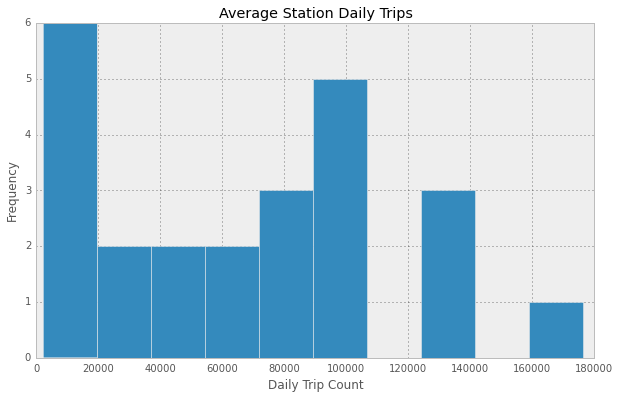

In [44]:
df.hist()

plt.title('Average Station Daily Trips')
plt.xlabel('Daily Trip Count')
plt.ylabel('Frequency')

plt.show()

The histogram shows the distribution is right-skewed, a lot of stations have fewer than 20 daily trips with a few outlier stations with more thatn 50 trips.

We can use the DataFrame's `describe` method to quickly get a read on the shape of the data through descriptive statistics.

In [45]:
df.describe()

,trips
count,24.000000
mean,65792.708333
std,47642.440911
min,2201.000000
25%,24541.500000
50%,68098.500000
75%,92067.750000
max,176240.000000


The median originating trip count is about 13 while the mean is 15.5, which confirms the right-skewness we observed. 

In the above histogram, the top of the bar in the `10` trip bin is touching the edge of the chart. We can manually set the y-limit to a greater value using the `ylim` property of the `plt` object to prevent this from occurring.

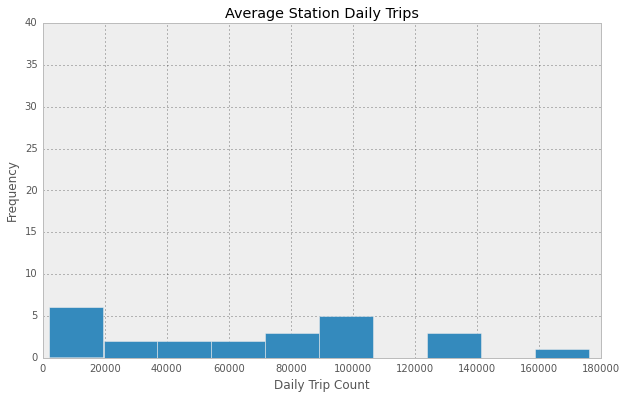

In [46]:
df.hist()

plt.title('Average Station Daily Trips')
plt.xlabel('Daily Trip Count')
plt.ylabel('Frequency')

# Set the lower and upper limits of the y-axis
plt.ylim(0,40)

plt.show()

### Part IV: Advanced Formatting
In this section we'll go through some additional formatting adjustments beyond the previous scope.

#### Removing gridlines
In that last histogram above, the gridlines don't line up exactly with the bin edges and the effect is distracting. We can remove the x-axis gridlines to clean up the plot using the `plt.gca().xaxis.grid(False)` command. Here, `gca()` means get the current axis object from which we get the x-axis and set the grid property to false.

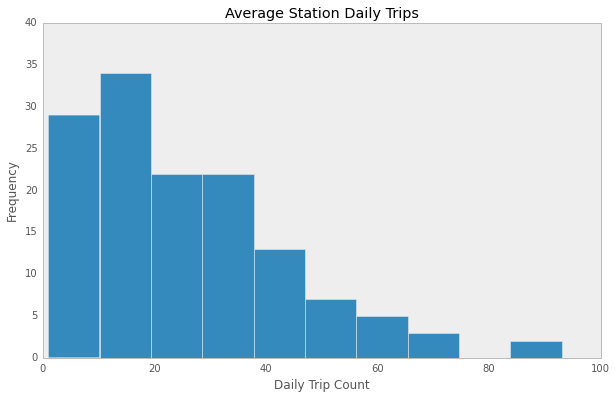

In [58]:
query = """
with station_date_trips as
(
select
    station
    , date(start_date) trip_date
    , count(trip_id) trips
from
    trips
join
    stations
on
    strt_statn = statn_id
group by
    1,2
)
select
    station
    , avg(trips) avg_daily_trips
from
    station_date_trips
group by
    1
order by
    2 desc
"""

df = pd.read_sql(query, conn)
df = df.set_index('station')

df.hist()

plt.title('Average Station Daily Trips')
plt.xlabel('Daily Trip Count')
plt.ylabel('Frequency')
plt.ylim(0,40)

# Remove the x-axis gridlines 
plt.gca().xaxis.grid(False)

# We can remove the y gridlines with a similar call
plt.gca().yaxis.grid(False)

plt.show()

#### Different y-axis
In many situtations we want to plot two time series with different scales at the same time. The following query gets the total number of unique bikes used each day and the total duration of all trips in minutes. In the dataset, there are about 1200 unique bikes buy on some days the total duration of all rights exceeds 250,000 minutes. 

In [59]:
query = """
select
	date(start_date) as trip_date
	, count(distinct bike_nr) as bikes_used
	, sum(duration) / 60 total_duration
from
	trips
group by
	1
order by
	1
"""
df = pd.read_sql(query, conn)
df.trip_date = pd.to_datetime(df.trip_date)
df = df.set_index('trip_date')


To add series to the secondary y-axis, pass them in a list to the `plot` method in the `secondary_y` parameter.

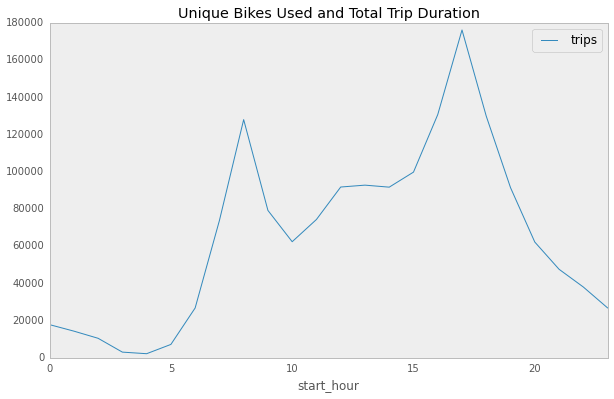

In [49]:
# Add secondary_y=[column1, column2]
df.plot(secondary_y=['bikes_used'])

plt.title('Unique Bikes Used and Total Trip Duration')

plt.show()

#### Tweaking axes formatting
In some cases we might want to adjust the formatting on the axis tick labels. In the first bar plot above, we are missing the comma separator in the 1,000 values and up. Matplotlib offeres a ticker formatter class where we can pass in a custom formatting function. In this example, we'll pass in `lambda x, p: format(int(x), ',')`. Don't worry if you don't understand this at first, included in the comments is another formatting function for percentages.

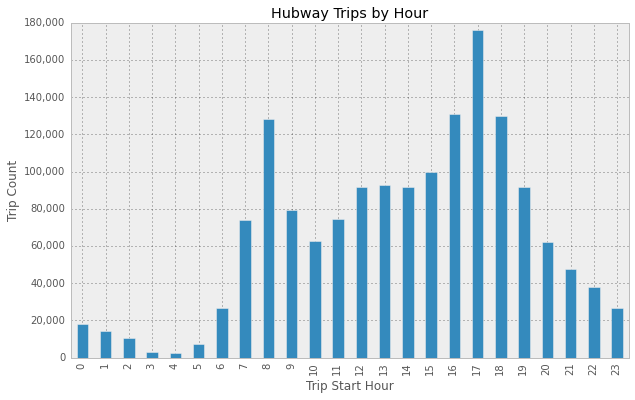

In [50]:
query = """
select
    extract(hour from start_date) as start_hour
    , count(trip_id) trips
from
    trips
group by
    1
order by
    1
"""
df = pd.read_sql(query, conn)
df = df.set_index('start_hour')

df.plot(kind='bar', legend=False)
plt.xlabel('Trip Start Hour')
plt.ylabel('Trip Count')
plt.title('Hubway Trips by Hour')

# Add a custom format function
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: 
                                                                    format(int(x), ',')))

# If we wanted percentages instead we could use this:
# lambda x, p: format(str(int(x * 100))+'%')

plt.show()

#### Annotations

Matplotlib offers the ability to make annotations to plots such as drawing a mean line and labeling the line with text. The API allows almost anything so we'll keep it simple in this example.

Let's consider the trip counts by hour we've been working with. Adding a straight line representing the mean across all times of day takes three steps. First we calculate the mean of the `trips` column in the DataFrame. Then we use `plt.axhline` and pass in the calculated mean. Finally we use `plt.annotate` to add the desired text and set the position. Position is based on the xy values of the axes. Typically, you'll want to experiment with position parameters to find optimal placement

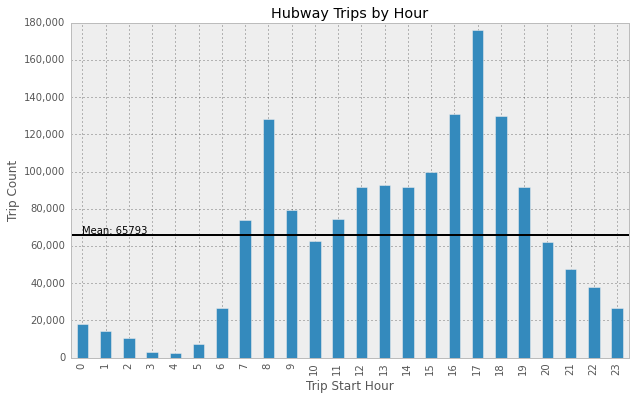

In [51]:
df.plot(kind='bar', legend=False)
plt.xlabel('Trip Start Hour')
plt.ylabel('Trip Count')
plt.title('Hubway Trips by Hour')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: 
                                                                    format(int(x), ',')))

# Mean of hourly trips
trip_mean = int(np.around(df.trips.mean()))
# Draw the line
plt.axhline(y=trip_mean, linewidth = 2, color='black')
# Add the text annotation
plt.annotate('Mean: '+ str(trip_mean),xy=(0,trip_mean + 1000))

plt.show()

## Conclusion

This notebook offered a brief introduction into basic plotting and formatting of plots with pandas and matplotlib. With the DataFrame's `plot` method and the pyplot's `plt` object you get a lot of control over the look and feel of a plot while still remaining easy to use. 

Other Python plotting resources:
* [Pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html)
* [Plotting with pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [Matplotlib section of SciPy lecture notes](https://scipy-lectures.github.io/intro/matplotlib/matplotlib.html)
* [Matplotlib in-depth](http://www.astro.washington.edu/users/vanderplas/Astr599/notebooks/12_AdvancedMatplotlib)